# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


<ipython-input-2-1fbd9174b086>:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  train_dataset = h5py.File(path_to_train)
<ipython-input-2-1fbd9174b086>:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  test_dataset = h5py.File(path_to_test)


Image shape : (64, 64, 3)


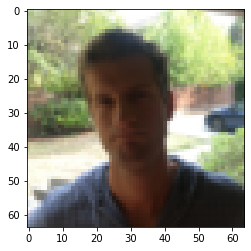

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(64,64,3)))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 32769     
Total params: 33,793
Trainable params: 33,729
Non-trainable params: 64
_________________________________________________________________


In [9]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [10]:
history_model = model.fit(X_train, Y_train, epochs=30, batch_size=30)

Epoch 1/30
20/20 [==============================] - 1s 67ms/step - loss: 0.9708 - accuracy: 0.7150
Epoch 2/30
20/20 [==============================] - 1s 64ms/step - loss: 0.1793 - accuracy: 0.9200
Epoch 3/30
20/20 [==============================] - 1s 63ms/step - loss: 0.0883 - accuracy: 0.9683
Epoch 4/30
20/20 [==============================] - 1s 67ms/step - loss: 0.0832 - accuracy: 0.9750
Epoch 5/30
20/20 [==============================] - 1s 63ms/step - loss: 0.0609 - accuracy: 0.9783
Epoch 6/30
20/20 [==============================] - 1s 65ms/step - loss: 0.0703 - accuracy: 0.9783
Epoch 7/30
20/20 [==============================] - 1s 67ms/step - loss: 0.0260 - accuracy: 0.9917
Epoch 8/30
20/20 [==============================] - 1s 64ms/step - loss: 0.0301 - accuracy: 0.9933
Epoch 9/30
20/20 [==============================] - 1s 68ms/step - loss: 0.0394 - accuracy: 0.9850
Epoch 10/30
20/20 [==============================] - 1s 72ms/step - loss: 0.0215 - accuracy: 0.9950
Epoch 11/

# Evaluate / Test

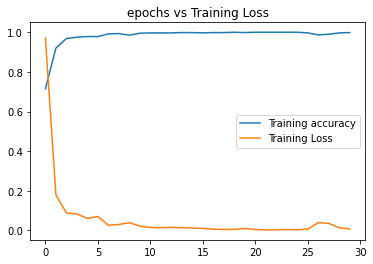

In [11]:
train_loss = history_model.history['loss']

train_accuracy = history_model.history['accuracy']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [16]:
# Code Here

model.evaluate(X_test,Y_test,)

5/5 [==============================] - 0s 9ms/step - loss: 0.1029 - accuracy: 0.9600


[0.1029306948184967, 0.9599999785423279]

In [26]:
y_pred = model.predict(X_test)

Confusion Matrix

In [32]:
y_pred

array([[1.00000000e+00],
       [9.99874234e-01],
       [9.99999166e-01],
       [9.99995410e-01],
       [8.60287309e-01],
       [9.99329448e-01],
       [9.97808218e-01],
       [1.12833679e-02],
       [9.98258471e-01],
       [3.12853456e-02],
       [9.97706532e-01],
       [2.33037472e-02],
       [5.05931616e-01],
       [4.75784034e-01],
       [1.59466863e-02],
       [9.99312878e-01],
       [7.03215599e-04],
       [9.99857306e-01],
       [3.87325883e-03],
       [9.99999881e-01],
       [9.90737796e-01],
       [9.99534607e-01],
       [3.69159818e-01],
       [9.99999762e-01],
       [3.08549404e-03],
       [1.36667490e-03],
       [9.81026649e-01],
       [1.03326470e-01],
       [2.17652470e-01],
       [9.99907613e-01],
       [9.99658704e-01],
       [9.99967098e-01],
       [9.99428809e-01],
       [9.99992490e-01],
       [9.99772310e-01],
       [9.99951065e-01],
       [1.04275852e-01],
       [1.20335519e-02],
       [5.45307100e-02],
       [9.38010216e-03],


In [33]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)

In [34]:
# Code Here
confusion_matrix(Y_test, y_pred1)

array([[60,  6],
       [ 0, 84]], dtype=int64)

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)
